In [627]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from pathlib import Path
from functools import reduce

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [628]:
path = Path('./corona_data_sets') # use your path
all_files = list(path.rglob("*.csv"))

In [629]:
d = {}

for p in all_files:
    df = pd.read_csv(p, index_col=None, header=0, converters={'ags2': str, 'ags5': str})
    df = df.drop(['bundesland', 'kreis', '_id'], 1)
    try:
        df = df.drop(['id'], 1) # only few dbs have the 'id' column
    except:
        pass
    d[p.stem] = df

In [630]:
d.keys()

dict_keys(['private_finanzen', 'verkehr', 'bevoelkerung', 'oeffentliche_finanzen', 'tourismus', 'pendler', 'krankenhausdaten', 'arbeitsmarktentwicklung', 'firmeninformationen', 'haushalte', 'erreichbarkeit', 'raumordnung', 'point_of_interest', 'genesene', 'ausbildungssituation', 'flaechennutzung', 'volkswirtschaftliche_gesamtrechnung', 'firmenveraenderungen'])

In [631]:
company_changes = d["firmenveraenderungen"]
filter_col = [col for col in company_changes if col.startswith('d20')]
company_changes["value"] = company_changes[filter_col].mean(axis=1)
company_changes = company_changes.drop(filter_col, 1)
company_changes = company_changes.loc[company_changes['variable'] == 'kr_firm_loesch_m']
company_changes = company_changes.drop(['variable'], 1)
company_changes = company_changes[:-1]
d["firmenveraenderungen"] = company_changes

In [632]:
d.pop("genesene")

,ags2,ags5,variable,d20200301,d20200302,d20200303,d20200304,d20200305,d20200306,d20200307,...,d20210605,d20210606,d20210607,d20210608,d20210609,d20210610,d20210611,d20210612,d20210613,d20210614
0,01,01001,kr_gen_md,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,01,01002,kr_gen_md,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,01,01003,kr_gen_md,0,0,0,0,0,0,0,...,2,0,1,0,0,0,0,0,0,0
3,01,01004,kr_gen_md,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,01,01051,kr_gen_md,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,16,16073,kr_gen_md_kum,0,0,0,0,0,0,0,...,6451,6451,6451,6451,6451,6452,6452,6452,6452,6452
798,16,16074,kr_gen_md_kum,0,0,0,0,0,0,0,...,4582,4582,4582,4582,4582,4582,4582,4582,4582,4582
799,16,16075,kr_gen_md_kum,0,1,1,1,1,1,1,...,6232,6232,6232,6233,6233,6233,6233,6233,6233,6233
800,16,16076,kr_gen_md_kum,0,0,0,0,0,0,0,...,7503,7503,7503,7503,7503,7503,7503,7503,7503,7503


In [633]:
{k: len(set(v["ags2"])) for k, v in d.items()}

{'private_finanzen': 16,
 'verkehr': 16,
 'bevoelkerung': 16,
 'oeffentliche_finanzen': 16,
 'tourismus': 16,
 'pendler': 16,
 'krankenhausdaten': 16,
 'arbeitsmarktentwicklung': 16,
 'firmeninformationen': 16,
 'haushalte': 16,
 'erreichbarkeit': 16,
 'raumordnung': 16,
 'point_of_interest': 16,
 'ausbildungssituation': 16,
 'flaechennutzung': 16,
 'volkswirtschaftliche_gesamtrechnung': 16,
 'firmenveraenderungen': 16}

In [634]:
d["arbeitsmarktentwicklung"]

,ags2,ags5,kr_ka_au_202001,kr_ka_au_202002,kr_ka_au_202003,kr_ka_au_202004,kr_ka_au_202005,kr_ka_au_202006,kr_ka_au_202007,kr_ka_au_202008,...,kr_rlb_202007,kr_rlb_202008,kr_rlb_202009,kr_rlb_202010,kr_rlb_202011,kr_rlb_202012,kr_rlb_202101,kr_rlb_202102,kr_rlb_202103,kr_rlb_202104
0,01,01001,0,0,185,758,70,21,8,12,...,11528,11401,11211,11018,10941,10988,11066,11165.082749,11193.617211,11111.999397
1,01,01002,5,4,344,1812,169,49,22,90,...,32153,31937,31493,31075,31018,30842,30738,30950.568347,30985.965972,30847.303052
2,01,01003,0,0,370,1722,177,41,20,35,...,24463,24097,23613,23157,23179,23354,23491,23601.855952,23703.798710,23599.499787
3,01,01004,0,0,142,642,55,15,5,0,...,8997,8893,8847,8730,8707,8667,8838,8870.375277,8954.945551,8825.197032
4,01,01051,0,0,181,1046,80,34,15,0,...,10188,10002,9781,9613,9614,9706,9775,9817.517458,9890.821675,9906.267154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,16,16073,0,5,704,510,81,18,12,14,...,4985,4934,4824,4750,4751,4721,4727,4793.027079,4938.773207,4762.884313
397,16,16074,0,3,441,432,45,14,10,5,...,3324,3255,3181,3077,3022,2978,2994,3032.964802,3040.304609,3036.686847
398,16,16075,5,7,348,611,75,17,9,5,...,3445,3327,3270,3102,3060,3042,3060,3089.952200,3178.729884,3102.771109
399,16,16076,3,0,471,738,84,31,20,9,...,4126,4025,3949,3829,3826,3826,3891,3881.375161,3890.171929,3874.523927


In [635]:
{k: len(set(v["ags5"])) for k, v in d.items()}

{'private_finanzen': 401,
 'verkehr': 401,
 'bevoelkerung': 401,
 'oeffentliche_finanzen': 401,
 'tourismus': 401,
 'pendler': 401,
 'krankenhausdaten': 401,
 'arbeitsmarktentwicklung': 401,
 'firmeninformationen': 401,
 'haushalte': 401,
 'erreichbarkeit': 401,
 'raumordnung': 401,
 'point_of_interest': 401,
 'ausbildungssituation': 401,
 'flaechennutzung': 401,
 'volkswirtschaftliche_gesamtrechnung': 401,
 'firmenveraenderungen': 401}

In [636]:
dataFrames = [v for v in d.values()]

total_number_of_columns = 1 # for ags2 (ags 5 becomes index, so not counted as a column)
for df in dataFrames:
    total_number_of_columns += len(df.columns) - 2 # dono't double count ags2 and ags 5 for every table
    
print('Total number of columns: ', total_number_of_columns)

Total number of columns:  560


In [637]:
df_final = dataFrames[0].sort_values(by=['ags5'])
for df in dataFrames[1:]:
    for col in df.columns:
        df_final[col] = df.sort_values(by=['ags5'])[col]

# set the index
df_final.set_index('ags5', inplace=True, drop=True)

In [638]:
df_final

,ags2,kr_ein_md,kr_schu_qu,kr_hh_eink_kl1,kr_hh_eink_kl2,kr_hh_eink_kl3,kr_hh_eink_kl4,kr_hh_eink_kl5,kr_hh_eink_kl6,kr_kk_hh,...,kr_bws,kr_bws_bd,kr_bws_ld,kr_bws_ps_ant,kr_bws_sk_ant,kr_bws_ts_ant,kr_bws_ps_et,kr_bws_ss_et,kr_bws_ts_et,value
ags5,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,2986,16.0,13209,12385,13092,5441,3096,3497,34496,...,56.5,1.1,4.0,0.0,20.6,79.4,17.5,88.0,51.7,NaN
NaN,NaN,3304,12.1,22126,38523,39483,18567,11162,7841,35246,...,60.5,3.6,12.5,0.0,16.9,83.1,19.6,86.3,57.1,NaN
NaN,NaN,3036,15.1,22881,30159,32571,15805,10999,9039,37219,...,61.6,2.7,9.4,0.1,23.8,76.1,35.8,79.0,57.8,NaN
NaN,NaN,2842,17.9,7208,13291,10435,3812,3201,2805,38141,...,56.1,1.0,3.4,0.5,23.4,76.1,33.7,72.5,52.7,NaN
NaN,NaN,2914,12.8,11806,11575,17816,9873,7834,7676,46945,...,65.1,1.3,4.7,4.3,38.5,57.2,48.7,115.9,51.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,2466,8.3,12237,13267,19810,5653,3271,2547,39242,...,54.1,0.9,4.7,1.3,40.0,58.7,35.4,62.7,50.1,NaN
NaN,NaN,2288,7.6,5131,9216,14445,5254,3446,2379,42956,...,50.1,0.6,3.1,2.3,36.5,61.2,27.4,51.6,50.7,NaN
NaN,NaN,2253,7.6,7388,7994,17082,4532,2501,1632,40511,...,53.4,0.7,3.7,3.6,45.5,50.9,42.3,57.2,51.3,NaN


In [639]:
df = df_final
#X = df.drop(["ags5"], 1)
pca = PCA(n_components=3)

In [640]:
pca.fit(X)

PCA(n_components=3)

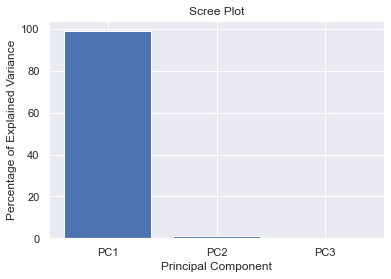

In [641]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

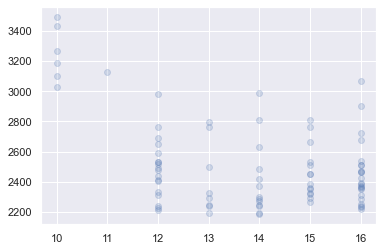

In [642]:
# plot data
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha=0.2)

In [643]:
 projected = pca.fit_transform(df)
print(df.shape)
print(projected.shape)

plt.scatter(projected[:, 0], projected[:, 1],
             edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
principalComponents = pca.fit_transform(X)
PCA_components = pd.DataFrame(principalComponents)
PCA_components

In [ ]:
print(pd.DataFrame(pca.components_,columns=df.columns,index = ['PC-1','PC-2','PC-3']))

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
km = KMeans(n_clusters=3).fit(df)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = km.labels_

In [ ]:
cluster_map